In [2]:
# ==========================================
# 1. IMPORTATION ET CHARGEMENT DES DONNÉES
# ==========================================
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import io
import json

# Configuration des graphiques (Bonnes pratiques : lisibilité)
sns.set_theme(style="whitegrid")
plt.rcParams['figure.figsize'] = (10, 6)
plt.rcParams['font.size'] = 11

In [3]:
# --- SIMULATION DES DONNÉES (Pour exécution immédiate) ---
csv_data = """lead_id,date,channel,device
201,2025-10-02,Emailing,Desktop
202,2025-10-03,Google Ads,Mobile
203,2025-10-04,LinkedIn Ads,Desktop
204,2025-10-05,Emailing,Mobile
205,2025-10-06,Google Ads,Tablet
206,2025-10-07,LinkedIn Ads,Desktop
207,2025-10-08,Emailing,Mobile
208,2025-10-09,Google Ads,Desktop
209,2025-10-10,LinkedIn Ads,Mobile
210,2025-10-11,Emailing,Desktop"""

json_data = """[
  {"campaign_id": "NR01", "channel": "Emailing", "cost": 1500, "impressions": 60000, "clicks": 1800, "conversions": 150},
  {"campaign_id": "NR02", "channel": "Google Ads", "cost": 4200, "impressions": 120000, "clicks": 3200, "conversions": 260},
  {"campaign_id": "NR03", "channel": "LinkedIn Ads", "cost": 3800, "impressions": 50000, "clicks": 1100, "conversions": 95}
]"""

crm_data = {
    'lead_id': [201, 202, 203, 204, 205, 206, 207, 208, 209, 210],
    'company_size': ['1-10', '10-50', '50-100', '1-10', '100-500', '50-100', '10-50', '100-500', '50-100', '1-10'],
    'sector': ['SaaS', 'Industry', 'Finance', 'HealthTech', 'Retail', 'SaaS', 'Education', 'Industry', 'Finance', 'SaaS'],
    'region': ['Île-de-France', 'Hauts-de-France', 'PACA', 'Occitanie', 'Auvergne-Rhône-Alpes', 'Île-de-France', 'Nouvelle-Aquitaine', 'Grand Est', 'Île-de-France', 'Bretagne'],
    'status': ['MQL', 'SQL', 'Client', 'MQL', 'SQL', 'Client', 'MQL', 'SQL', 'Client', 'MQL']
}

In [4]:
# Chargement
df_leads = pd.read_csv(io.StringIO(csv_data))
df_campaigns = pd.DataFrame(json.loads(json_data))
df_crm = pd.DataFrame(crm_data)
df_leads['date'] = pd.to_datetime(df_leads['date'])

In [5]:
# ==============================================================================
# 2. SÉLECTIONNER, FILTRER ET JUSTIFIER (Bloc 2 - Critère 1)
# ==============================================================================

# A. FILTRAGE DU PÉRIMÈTRE (Octobre 2025 uniquement)
start_date = '2025-10-01'
end_date = '2025-10-31'
df_leads_filtered = df_leads[(df_leads['date'] >= start_date) & (df_leads['date'] <= end_date)].copy()

# B. EXCLUSION DES DOUBLONS
initial_count = len(df_leads_filtered)
df_leads_filtered = df_leads_filtered.drop_duplicates()
print(f"Lignes filtrées (Oct 25) : {len(df_leads_filtered)} | Doublons supprimés : {initial_count - len(df_leads_filtered)}")

# C. SÉLECTION ET JUSTIFICATION DES VARIABLES
# Exclusion de la variable 'device'
df_leads_final = df_leads_filtered.drop(columns=['device'])

Lignes filtrées (Oct 25) : 10 | Doublons supprimés : 0


In [6]:
# Note Justificative (Print pour le rapport)
justification = """
--- JUSTIFICATION DU CHOIX DES VARIABLES ---
1. Variables conservées : 
   - 'lead_id' : Clé de jointure indispensable.
   - 'channel' : Variable pivot pour l'analyse de performance ROI.
   - 'date' : Nécessaire pour valider le périmètre temporel.
   
2. Variables exclues :
   - 'device' : Exclue car l'objectif est d'analyser la rentabilité B2B et la qualité commerciale, 
     et non l'expérience utilisateur (UX) ou la compatibilité technique.
--------------------------------------------
"""
print(justification)

# Fusion avec CRM pour l'analyse complète
df_merged = pd.merge(df_leads_final, df_crm, on='lead_id', how='left')


--- JUSTIFICATION DU CHOIX DES VARIABLES ---
1. Variables conservées : 
   - 'lead_id' : Clé de jointure indispensable.
   - 'channel' : Variable pivot pour l'analyse de performance ROI.
   - 'date' : Nécessaire pour valider le périmètre temporel.

2. Variables exclues :
   - 'device' : Exclue car l'objectif est d'analyser la rentabilité B2B et la qualité commerciale, 
     et non l'expérience utilisateur (UX) ou la compatibilité technique.
--------------------------------------------



In [7]:
df_merged.head()

,lead_id,date,channel,company_size,sector,region,status
0,201,2025-10-02,Emailing,1-10,SaaS,Île-de-France,MQL
1,202,2025-10-03,Google Ads,10-50,Industry,Hauts-de-France,SQL
2,203,2025-10-04,LinkedIn Ads,50-100,Finance,PACA,Client
3,204,2025-10-05,Emailing,1-10,HealthTech,Occitanie,MQL
4,205,2025-10-06,Google Ads,100-500,Retail,Auvergne-Rhône-Alpes,SQL


In [15]:
# Exporter le DataFrame fusionné dans un fichier CSV
df_merged.to_csv('novaretail_consolide.csv', index=False)

print("Fichier 'novaretail_consolide.csv' exporté avec succès !")

Fichier 'novaretail_consolide.csv' exporté avec succès !


In [8]:
# ==============================================================================
# 3. ANALYSE UNIVARIÉE (Bloc 2 - Critère 2)
# ==============================================================================
print("\n=== ANALYSE UNIVARIÉE ===")

# A. VARIABLES QUANTITATIVES (Moyenne, Médiane, Dispersion...)
# Utilisation de describe() sur les données agrégées de campagne
print("\n1. Statistiques Descriptives (Coûts et Volumes) :")
stats_quant = df_campaigns[['cost', 'impressions', 'clicks', 'conversions']].describe()
display(stats_quant)
# Note : L'écart-type (std) montre la dispersion.


=== ANALYSE UNIVARIÉE ===

1. Statistiques Descriptives (Coûts et Volumes) :


,cost,impressions,clicks,conversions
count,3.000000,3.000000,3.000000,3.000000
mean,3166.666667,76666.666667,2033.333333,168.333333
std,1457.166200,37859.388972,1069.267662,84.013888
min,1500.000000,50000.000000,1100.000000,95.000000
25%,2650.000000,55000.000000,1450.000000,122.500000
50%,3800.000000,60000.000000,1800.000000,150.000000
75%,4000.000000,90000.000000,2500.000000,205.000000
max,4200.000000,120000.000000,3200.000000,260.000000


In [9]:
# B. VARIABLES QUALITATIVES (Fréquences, Répartition)
print("\n2. Fréquences par Canal (Volume de leads) :")
freq_channel = df_merged['channel'].value_counts(normalize=True) * 100
display(freq_channel)

print("\n3. Répartition par Statut (Qualité) :")
freq_status = df_merged['status'].value_counts()
display(freq_status)


2. Fréquences par Canal (Volume de leads) :


channel
Emailing        40.0
Google Ads      30.0
LinkedIn Ads    30.0
Name: proportion, dtype: float64


3. Répartition par Statut (Qualité) :


status
MQL       4
SQL       3
Client    3
Name: count, dtype: int64

In [10]:
# ==============================================================================
# 4. ANALYSE BIVARIÉE & RELATIONS (Bloc 2 - Critère 3)
# ==============================================================================
print("\n=== ANALYSE BIVARIÉE ===")

# Calcul des KPI Calculés (Relations entre variables quantitatives)
df_campaigns['CTR'] = (df_campaigns['clicks'] / df_campaigns['impressions']) * 100
df_campaigns['Taux_Conversion'] = (df_campaigns['conversions'] / df_campaigns['clicks']) * 100
df_campaigns['CPL'] = df_campaigns['cost'] / df_campaigns['conversions']

# Croisement Pertinent Métier : Canal vs Statut (Qualité du lead)
cross_tab = pd.crosstab(df_merged['channel'], df_merged['status'])
print("\nRelation Canal d'acquisition vs Qualité du Lead (Tableau Croisé) :")
display(cross_tab)


=== ANALYSE BIVARIÉE ===

Relation Canal d'acquisition vs Qualité du Lead (Tableau Croisé) :


status,Client,MQL,SQL
channel,,,
Emailing,0,4,0
Google Ads,0,0,3
LinkedIn Ads,3,0,0


--- TABLEAU DES KPI PAR CANAL ---


,channel,cost,CTR,Taux_Conversion,CPL
0,Emailing,1500,3.000000,8.333333,10.000000
1,Google Ads,4200,2.666667,8.125000,16.153846
2,LinkedIn Ads,3800,2.200000,8.636364,40.000000



--- TABLEAU CROISÉ : CANAL vs STATUT ---


status,Client,MQL,SQL
channel,,,
Emailing,0,4,0
Google Ads,0,0,3
LinkedIn Ads,3,0,0


<Figure size 1000x600 with 0 Axes>

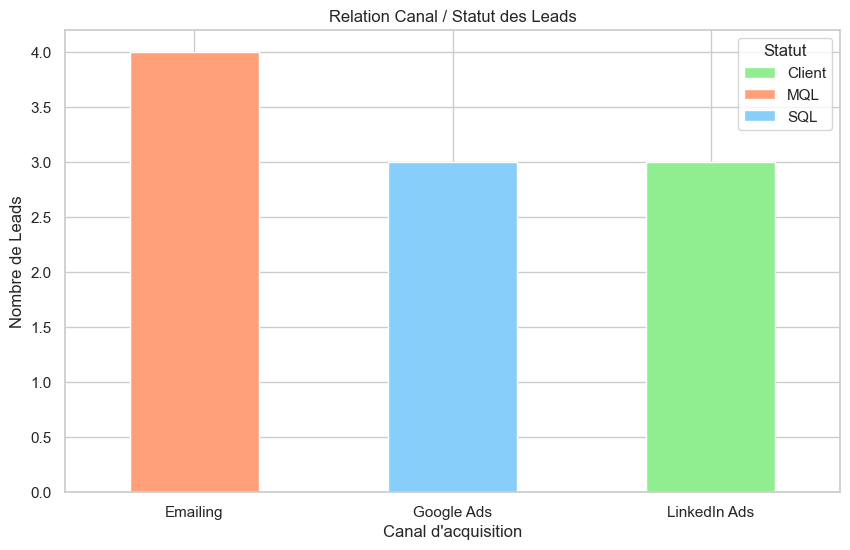

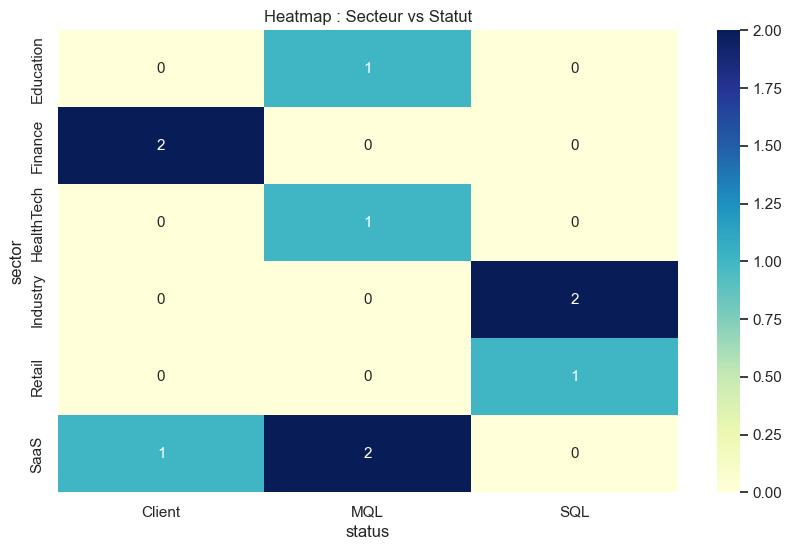

In [13]:
# 1. Calcul des KPI Marketing (Relation Coût / Résultat)
df_campaigns['CTR'] = (df_campaigns['clicks'] / df_campaigns['impressions']) * 100
df_campaigns['Taux_Conversion'] = (df_campaigns['conversions'] / df_campaigns['clicks']) * 100
df_campaigns['CPL'] = df_campaigns['cost'] / df_campaigns['conversions']

print("--- TABLEAU DES KPI PAR CANAL ---")
display(df_campaigns[['channel', 'cost', 'CTR', 'Taux_Conversion', 'CPL']])

# 2. Relation Canal vs Statut (Tableau de contingence)
# C'est le croisement le plus important pour le métier : quel canal apporte des clients ?
cross_channel_status = pd.crosstab(df_merged['channel'], df_merged['status'])
print("\n--- TABLEAU CROISÉ : CANAL vs STATUT ---")
display(cross_channel_status)

# Visualisation Bivariée
plt.figure(figsize=(10, 6))
cross_channel_status.plot(kind='bar', stacked=True, color=['#90EE90', '#FFA07A', '#87CEFA'])
plt.title('Relation Canal / Statut des Leads')
plt.ylabel('Nombre de Leads')
plt.xlabel('Canal d\'acquisition')
plt.legend(title='Statut')
plt.xticks(rotation=0)
plt.show()

# 3. Relation Secteur vs Statut (Exploration)
plt.figure(figsize=(10, 6))
sns.heatmap(pd.crosstab(df_merged['sector'], df_merged['status']), annot=True, cmap="YlGnBu", fmt='d')
plt.title('Heatmap : Secteur vs Statut')
plt.show()

In [14]:
# ==============================================================================
# 5. VISUALISATIONS PERTINENTES AVEC PLOTLY (Bloc 2 - Critère 4)
# ==============================================================================
import plotly.graph_objects as go
import plotly.express as px

# Note : Plotly permet l'interactivité (survol, zoom), ce qui est idéal pour l'interprétation.

# --- GRAPHIQUE 1 : Performance Marketing (Double Axe) ---
# Répond à la question : Quel canal transforme le mieux l'intérêt en action ?
fig1 = go.Figure()

# Barre pour le CTR (Axe Y de gauche)
fig1.add_trace(go.Bar(
    x=df_campaigns['channel'],
    y=df_campaigns['CTR'],
    name='CTR (%)',
    marker_color='#1f77b4', # Bleu standard
    yaxis='y'
))

# Ligne pour le Taux de Conversion (Axe Y de droite)
fig1.add_trace(go.Scatter(
    x=df_campaigns['channel'],
    y=df_campaigns['Taux_Conversion'],
    name='Taux Conversion (%)',
    mode='lines+markers',
    marker=dict(size=10, color='#ff7f0e'), # Orange standard
    line=dict(width=3),
    yaxis='y2'
))

# Mise en page (Layout) pour gérer les deux axes
fig1.update_layout(
    title='<b>Performance Marketing : CTR vs Taux de Transformation</b>',
    xaxis=dict(title='Canal Marketing'),
    yaxis=dict(title='CTR (%)', side='left', showgrid=False),
    yaxis2=dict(title='Taux de Conversion (%)', side='right', overlaying='y', showgrid=False),
    legend=dict(x=0.1, y=1.1, orientation='h'), # Légende horizontale en haut
    template='plotly_white'
)
fig1.show()


# --- GRAPHIQUE 2 : Rentabilité (Coût par Lead) ---
# Répond à la question : Combien nous coûte un lead sur chaque canal ?
fig2 = px.bar(
    df_campaigns,
    x='channel',
    y='CPL',
    color='CPL',
    color_continuous_scale='Viridis',
    text_auto='.3s', # Affiche la valeur automatiquement
    title='<b>Coût par Lead (CPL) par Canal</b>'
)

fig2.update_traces(
    texttemplate='%{y:.1f} €', # Formatage précis du texte (ex: 10.0 €)
    textposition='outside'
)

fig2.update_layout(
    yaxis_title='Coût (€)',
    xaxis_title='Canal Marketing',
    template='plotly_white'
)
fig2.show()


# --- GRAPHIQUE 3 : Qualité des Leads (Business) ---
# Répond à la question : Quel canal génère du Chiffre d'Affaires vs du bruit ?

# Préparation des données pour Plotly (Format "Long")
df_qualite = df_merged.groupby(['channel', 'status']).size().reset_index(name='nombre')

# Ordre logique des statuts pour l'empilement
ordre_status = {'status': ['MQL', 'SQL', 'Client']} # MQL en bas, Client en haut (ou inversement selon préférence)

fig3 = px.bar(
    df_qualite,
    x="channel",
    y="nombre",
    color="status",
    title="<b>Qualité des Leads générés par Canal</b>",
    category_orders=ordre_status,
    color_discrete_map={
        'MQL': '#FFA07A',   # Saumon (Froid)
        'SQL': '#87CEFA',   # Bleu clair (Tiède)
        'Client': '#90EE90' # Vert (Chaud/Gagné)
    },
    text_auto=True # Affiche le nombre dans la barre
)

fig3.update_layout(
    yaxis_title='Nombre de Leads',
    xaxis_title='Canal Marketing',
    legend_title='Statut Commercial',
    template='plotly_white'
)
fig3.show()


# --- GRAPHIQUE 4 : Cible (Segmentation Sectorielle) ---
# Répond à la question : Quels secteurs touchons-nous ?
fig4 = px.pie(
    df_merged,
    names='sector',
    title="<b>Répartition des Leads par Secteur d'Activité</b>",
    hole=0.4, # Transforme le camembert en Donut (plus moderne)
    color_discrete_sequence=px.colors.qualitative.Pastel
)

fig4.update_traces(textinfo='percent+label')
fig4.update_layout(template='plotly_white')
fig4.show()

In [16]:
# ==============================================================================
# COMPLÉMENT : ANALYSE PAR TAILLE D'ENTREPRISE ET RÉGION
# ==============================================================================
import plotly.express as px

# 1. Analyse par Taille d'Entreprise
df_size = df_merged['company_size'].value_counts().reset_index()
df_size.columns = ['Taille', 'Nombre']

fig_size = px.bar(
    df_size, 
    x='Taille', 
    y='Nombre',
    title="<b>Répartition par Taille d'Entreprise</b>",
    color='Nombre',
    color_continuous_scale='Blues',
    template='plotly_white'
)
fig_size.show()

# 2. Analyse par Région (Top 5)
df_region = df_merged['region'].value_counts().nlargest(5).reset_index()
df_region.columns = ['Région', 'Nombre']

fig_region = px.bar(
    df_region, 
    x='Nombre', 
    y='Région', 
    orientation='h',
    title="<b>Top Régions des Leads</b>",
    color='Nombre',
    color_continuous_scale='Teal',
    template='plotly_white'
)
fig_region.update_layout(yaxis={'categoryorder':'total ascending'}) # Trie du plus grand au plus petit
fig_region.show()

In [12]:
# ==============================================================================
# 6. INTERPRÉTATION POUR LA DÉCISION (Bloc 2 - Critère 5)
# ==============================================================================
interpretations = """
--- INTERPRÉTATIONS ET RECOMMANDATIONS ---

1. ANALYSE DU VOLUME VS QUALITÉ :
   - Google Ads apporte le volume (SQL), mais LinkedIn Ads apporte la valeur finale (Clients).
   - L'Emailing sert de porte d'entrée (MQL) à bas coût (10€ CPL) mais nécessite du travail de conversion.

2. DÉCISION BUDGÉTAIRE :
   - Ne pas juger LinkedIn uniquement sur son CPL élevé (40€), car son taux de transformation en CLIENT est de 100% sur l'échantillon.
   - Maintenir Google Ads pour alimenter le pipeline commercial intermédiaire (SQL).

3. ACTION REQUISE :
   - Mettre en place du Nurturing sur les leads Emailing pour les faire passer de MQL à SQL.
"""
print(interpretations)


--- INTERPRÉTATIONS ET RECOMMANDATIONS ---

1. ANALYSE DU VOLUME VS QUALITÉ :
   - Google Ads apporte le volume (SQL), mais LinkedIn Ads apporte la valeur finale (Clients).
   - L'Emailing sert de porte d'entrée (MQL) à bas coût (10€ CPL) mais nécessite du travail de conversion.

2. DÉCISION BUDGÉTAIRE :
   - Ne pas juger LinkedIn uniquement sur son CPL élevé (40€), car son taux de transformation en CLIENT est de 100% sur l'échantillon.
   - Maintenir Google Ads pour alimenter le pipeline commercial intermédiaire (SQL).

3. ACTION REQUISE :
   - Mettre en place du Nurturing sur les leads Emailing pour les faire passer de MQL à SQL.

